# Progetto Intelligenza Artificiale 2022/2023
## N-Queens problem

### `Rosario Scavo`

# Table of Contents:
* [Problem description](#problem-description)
* [Board](#board)
  * [Board generation](#board-generation)
    * [One per column](#one-per-col)
    * [One per row](#one-per-row)
  * [Board visualization](#board-vis)
* [Count the number of conflicts](#count-conflicts)
  * [$O(n^2)$ solution](#count-conflicts-squared)
  * [$O(n)$ solution](#count-conflicts-linear)
  * [Speed comparison](#speed-comparison)
* [Methods](#methods)
  * [Random Search](#random-search)
  * [Backtracking](#backtracking)
  * [Hill-Climbing](#hill-climbing)
    * [Hill-Climbing without Sideways Moves](#hill-climbing-no-side)
    * [Stochastic Hill Climbing with Sideways Moves](#hill-climbing-side)
    * [Random-restart Hill-Climbing](#random-restart-hill-climbing)
  * [Simulated Annealing](#simulated-annealing)
  * [Genetic Algorithms](#genetic)
    * [Hyperparameter Tuning](#genetic-tuning)
* [Conclusion](#conclusion)

# The N-Queens Problem <a id="problem-description"></a>

The **N-Queens problem** is a classic puzzle in which the challenge is to place *N* queens on an *N x N* chessboard in such a way that no two queens threaten each other. This means that no two queens can be placed in the same row, column, or diagonal. The significance of this problem in **Artificial Intelligence (AI)** lies in its use as a benchmark for evaluating algorithms, particularly those involving **backtracking** and **search strategies**.

![nqueens](images/nqueens.png)

In [2]:

import numpy as np
from typing import List
from typing import Tuple
from typing import Callable
from typing import Optional
import matplotlib.pyplot as plt

import time
import sys
import random

# Board <a id="board"></a>

## Board generation <a id="board-generation"></a>

### One queen per column <a id="one-per-col"></a>

Am efficient way to represent the board is by using a single list or array, where each element represents a column, and the value of the element represents the row where the queen is placed.

For example, a board with nqueens = 5 and queens placed at (0,0), (2,1), (4,2), (1,3), and (3,4) can be represented as follows:

[0, 2, 4, 1, 3]

For each column, a row is picked out randomly. The number of possible states is then $n^n$.

In [2]:
def gen_board_per_col(nqueens: int) -> np.ndarray:
    """generate a random board

    Args:
        nqueens (int): number of queens

    Returns:
        np.ndarray: board with queens positions.
        Column index is the queen position (the index) and the value is the row index
    """
    board = np.random.randint(low=0, high=nqueens, size=nqueens)
    return board

### One queen per row <a id="one-per-row"></a>

For each column, a queen is placed in a row on which no queen has been placed previously. The number of possible states is then $n!$.

In [3]:
def gen_board_per_col_row(nqueens: int) -> np.ndarray:
    """generate a random board

    Args:
        nqueens (int): number of queens

    Returns:
        np.ndarray: board with queens positions.
        Column index is the queen position (the index) and the value is the row index
    """
    board = np.random.choice(nqueens, size=nqueens, replace=False)
    return board

## Board visualization <a id="board-vis"></a>

The letter "Q" is commonly used to represent a queen, while a "-" or a "." is used to represent an empty space on the board.

In [4]:
def print_board(board: np.ndarray) -> None:
    """print the board. 'Q' is the queen and '.' is an empty space

    Args:
        board (np.ndarray): board with queens positions.
    """    
    n = len(board)
    for j in range(n):
        for i in range(n):
            c = 'Q' if board[i]==j else '.'
            print(c, end=' ')
        print()

In [6]:
board = gen_board_per_col(5)
print(board)
print_board(board)

[2 2 2 4 1]
. . . . . 
. . . . Q 
Q Q Q . . 
. . . . . 
. . . Q . 


In [7]:
board = gen_board_per_col_row(5)
print(board)
print_board(board)

[3 2 0 1 4]
. . Q . . 
. . . Q . 
. Q . . . 
Q . . . . 
. . . . Q 


# Count the number of conflicts <a id="count-conflicts"></a>

## $O(n^2)$ solution <a id="count-conflicts-squared"></a>

The function iterates over all pairs of queens in the board list, and checks if there is a conflict between them.
<br>
A conflict occurs if two queens are on the same row, on the same column, or on the same diagonal.

The time complexity of the count_conflicts function is $O(n^2)$, where $n$ is the size of the input board.

This is because the function iterates over all pairs of queens on the board, which requires nested loops that each run n times.
<br>
Specifically, the outer loop iterates over all columns $i$, while the inner loop iterates over all rows $j > i$. This ensures that each pair of queens is only counted once, and not twice (since conflicts are symmetric).

In [6]:
def count_conflicts_slow(board: np.ndarray) -> int:
    """count the number of conflicts in the board

    Args:
        board (np.ndarray): board with queens positions.

    Returns:
        int: number of conflicts
    """    
    n = len(board)
    conflicts = 0
    for i in range(n):
        for j in range(i+1, n):
            # Check if there is a conflict between queens in rows i and j
            if board[i] == board[j] or abs(board[i] - board[j]) == j - i:
                conflicts += 1
    return conflicts

## $O(n)$ solution <a id="count-conflicts-linear"></a>

The updated implementation initializes the **col_counts**, **diag_counts**, and **anti_diag_counts** arrays to zero. Then, we iterate over each column in the board and update the counts for the corresponding row and diagonals that the queen occupies.


Next, we iterate over each column again and compute the number of conflicts that the queen has with the other queens on the board. Since each conflict is counted twice (once for each queen involved), we divide the final count by two before returning it.


The new implementation has a time complexity of $O(n)$, where n is the size of the board. This is because both loops iterate over the board exactly once, and each iteration involves a constant amount of work. Therefore, the total time taken by the algorithm is proportional to $n$, making it linear in the size of the board.

In [5]:
def count_conflicts_fast(board: np.ndarray) -> int:
    """count the number of conflicts in the board

    Args:
        board (np.ndarray): board with queens positions.

    Returns:
        int: number of conflicts
    """    
    n = len(board)
    row_counts = np.zeros(n)
    pos_diag = np.zeros(2*n-1)
    neg_diag = np.zeros(2*n-1)
    conflicts = 0
    
    for j in range(n):
        queen_row = board[j]
        row_counts[queen_row] += 1
        neg_diag[j+queen_row] += 1
        pos_diag[n-1-j+queen_row] += 1
    
    for j in range(n):
        queen_row = board[j]
        conflicts += (row_counts[queen_row] - 1)
        conflicts += (neg_diag[j+queen_row] - 1)
        conflicts += (pos_diag[n-1-j+queen_row] - 1)
        
    return int(conflicts/2)


## Speed comparison <a id="speed-comparison"></a>

We may want to compare the time taken to solve the problem using an algorithm with time complexity proportional to n^2 versus one with linear time complexity.

If the input size is small, then the difference in time taken may not be significant. However, as the input size increases, the time difference between the two algorithms may become more pronounced.

Therefore, it's useful to compare the time taken by different algorithms to help choose the most efficient one for a given input size.

With $n=15$ we obtained:
* Time taken by count_conflicts_slow: `8.535385131835938e-05s`
* Time taken by count_conflicts_fast: `7.081031799316406e-05s`

With $n=5000$ we obtained:
* Time taken by count_conflicts_slow: `10.250566244125366s`
* Time taken by count_conflicts_fast: `0.019675254821777344s`

In [49]:
def timer_count_conflicts(board: np.ndarray, func: Callable[[np.ndarray], int]) -> None:
    """time the function that counts the number of conflicts in the board

    Args:
        board (np.ndarray): board with queens positions.
        func (Callable[[np.ndarray], int]): function to time
    """    
    start = time.time()
    num_conflicts = func(board)
    end = time.time()
    print(f"Time taken by {func.__name__}: {end-start}s")
    print("Number of conflicts", num_conflicts)

In [70]:
board = gen_board_per_col(15)
print_board(board)
timer_count_conflicts(board, count_conflicts_slow)
print()
timer_count_conflicts(board, count_conflicts_fast)

. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . Q . . . . . . . . . . . . 
. Q . . . . . . . . . Q . Q . 
. . . . . . . Q . . . . . . . 
. . . . . . . . . . . . . . . 
Q . . . Q . . . . . . . . . . 
. . . . . . . . . . . . . . Q 
. . . . . . . . . . . . Q . . 
. . . . . Q . . . . . . . . . 
. . . . . . Q . . . . . . . . 
. . . . . . . . Q . . . . . . 
. . . Q . . . . . . Q . . . . 
. . . . . . . . . Q . . . . . 
. . . . . . . . . . . . . . . 
Time taken by count_conflicts_slow: 8.535385131835938e-05s
Number of conflicts 15

Time taken by count_conflicts_fast: 7.081031799316406e-05s
Number of conflicts 15


In [72]:
board = gen_board_per_col(5000)

timer_count_conflicts(board, count_conflicts_slow)
print()
timer_count_conflicts(board, count_conflicts_fast)

Time taken by count_conflicts_slow: 10.250566244125366s
Number of conflicts 5775

Time taken by count_conflicts_fast: 0.019675254821777344s
Number of conflicts 5775


# Methods <a id="methods"></a>

In [69]:
def plot_experiments(success_rates: List[Tuple[int, float]], title: str) -> None:
    """Plot the success rates for the experiments

    Args:
        success_rates (List[Tuple[int, float]]): List of tuples with the number of queens and the success rate
        title (str): title of the plot
    """    
    plt.figure(figsize=(10,5))
    plt.plot(*zip(*success_rates), marker='o')
    plt.xticks([n for n, _ in success_rates])
    plt.xlabel("Number of queens")
    plt.ylabel("Success rate")
    plt.title(title)
    plt.show()

## Random Search <a id="random-search"></a>

The **Random Search** approach for solving the *N-Queens problem* involves randomly placing the queens on the chessboard and then iteratively adjusting their positions until a solution is found.

This method, part of the broader category of **stochastic search techniques**, starts by placing all *N* queens on the board in random positions. It then evaluates the board to identify conflicts, where two or more queens threaten each other. The algorithm randomly selects one of the conflicting queens and moves it to a different position, preferably one that reduces the total number of conflicts. This process repeats until a state is reached where no two queens threaten each other, signifying a solution.

#### Results
Random search can escape local optima, but finding a solution with more queens is challenging. We conducted a broad study on the algorithm's performance by testing it 10 times for each number of queens: `4, 8, 16`. We set the maximum time of execution of each test to 20 seconds.

Random Search was effective with low numbers of queens, achieving a success rate of about `70% with N=4`. However, it was not as effective with more queens, as it only achieved a `20% success rate with N=16`.

In [58]:
def random_search(n: int, 
                  func_generate_board: Callable[[int], List[int]], 
                  max_time_seconds: int = 20) -> np.ndarray:
    """Random search to solve the N-Queens problem.

    Args:
        n (int): Number of queens.
        func_generate_board (Callable[[int], List[int]]): Function to generate a random board.
        max_time_seconds (int, optional): Maximum time to run the algorithm. Defaults to 20.

    Returns:
        np.ndarray: Board with queens' positions.
    """
    time_start = time.time()
    board = func_generate_board(n)
    
    while (count_conflicts_fast(board) != 0 and 
           time.time() - time_start < max_time_seconds):
        # Randomly select a queen
        queen_idx = random.randint(0, n - 1)

        # Find a new position for this queen
        min_conflicts = float('inf')
        best_position = board[queen_idx]

        for pos in range(n):
            board[queen_idx] = pos
            conflicts = count_conflicts_fast(board)
            if conflicts < min_conflicts:
                min_conflicts = conflicts
                best_position = pos

        # Move the queen to the position with the fewest conflicts
        board[queen_idx] = best_position

    total_time = round(time.time() - time_start, 3)
    num_conflicts = count_conflicts_fast(board)
    
    if num_conflicts == 0:
        print(f"N-Queens's problem solved in {total_time}s")
    else:
        print(f"N-Queens's problem not solved in {total_time}s. Number of conflicts: {num_conflicts}")

    return board

solution = random_search(8, gen_board_per_col_row, max_time_seconds=10)
print_board(solution)

N-Queens's problem not solved in 10.0s. Number of conflicts: 1
. . . Q . . . Q 
Q . . . . . . . 
. . Q . . . . . 
. . . . . Q . . 
. Q . . . . . . 
. . . . . . Q . 
. . . . Q . . . 
. . . . . . . . 


In [59]:
def test_random_search(list_n: List[int], 
                       max_time_seconds: int = 20,
                       num_experiments: int = 10) -> List[Tuple[int, float]]:
    """Test the random search algorithm for different number of queens

    Args:
        list_n (List[int]): List of number of queens to test
        max_time_seconds (int, optional): Maximum time to run the algorithm. Defaults to 20.
        num_experiments (int, optional): Number of experiments to run for each number of queens. Defaults to 10.

    Returns:
        List[Tuple[int, float]]: List of tuples with the number of queens and the success rate
    """    
    success_rates = []
    for num_quuens in list_n:
        print(f"Testing {num_quuens} queens:")
        count_solved = 0
        for _ in range(num_experiments):
            board = random_search(num_quuens, gen_board_per_col_row, max_time_seconds)
            if count_conflicts_fast(board) == 0:
                count_solved += 1
        success_rates.append((num_quuens, count_solved/num_experiments))
        
    return success_rates

In [60]:
rs_success_rates = test_random_search([4, 8, 16], max_time_seconds=20, num_experiments=10)

Testing 4 queens:
N-Queens's problem solved in 0.001s
N-Queens's problem not solved in 20.0s. Number of conflicts: 1
N-Queens's problem solved in 0.002s
N-Queens's problem solved in 0.001s
N-Queens's problem solved in 0.001s
N-Queens's problem solved in 0.004s
N-Queens's problem solved in 0.0s
N-Queens's problem solved in 0.002s
N-Queens's problem not solved in 20.0s. Number of conflicts: 1
N-Queens's problem not solved in 20.0s. Number of conflicts: 1
Testing 8 queens:
N-Queens's problem not solved in 20.0s. Number of conflicts: 1
N-Queens's problem not solved in 20.0s. Number of conflicts: 1
N-Queens's problem not solved in 20.0s. Number of conflicts: 1
N-Queens's problem solved in 0.011s
N-Queens's problem not solved in 20.0s. Number of conflicts: 1
N-Queens's problem solved in 0.008s
N-Queens's problem solved in 0.007s
N-Queens's problem not solved in 20.0s. Number of conflicts: 1
N-Queens's problem not solved in 20.0s. Number of conflicts: 1
N-Queens's problem solved in 0.009s
Tes

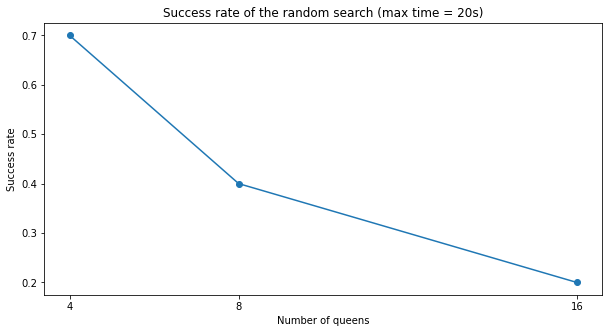

In [61]:
plot_experiments(rs_success_rates, "Success rate of the random search (max time = 20s)")

## Backtracking <a id="one-per-row"></a>

**Backtracking** is a method for solving problems by incrementally building candidates (small changes to the current state) to the solutions and abandoning  ("backtracking") a candidate as soon as it is determined that the candidate cannot lead to a valid solution.

When applied to the *N-Queens problem*, backtracking involves placing queens one by one in different columns, starting from the leftmost column. The algorithm tries placing a queen in the current column at all rows, one at a time, and checks for conflicts with already placed queens. 

#### Backtracking Step

The algorithm backtracks by removing the queen and tries to place it in a different row if a conflict is detected. If no position is possible in the current column, it backtracks to the previous column and finds new positions for the queen there.

### Efficiency

Backtracking is effective for the N-Queens problem as it reduces the search space, ensuring safe queen placements and an efficient solution.

### Results
In our study, the algorithm's performance has been tested on different numbers of queens: `4, 8, 16, 24, 32`. The success rate was evaluated for 10 executions for each number of queens, and the maximum execution time for each test was set to 20 seconds.

The algorithm obtained a `100%` success rate, with the number of queens ranging from 4 to 24. However, when the number of queens was increased to 32, the success rate decreased to 0. Even when the maximum execution time was increased to 1 minute, the algorithm failed to solve the problem with a high value of N, suggesting that the method is only effective for lower values of N.

![backtracking.png](images/backtracking.png)

In [10]:
def SolveNqueens(n: int, max_time_seconds: int = 20) -> np.ndarray:
    """Solve the N-Queens problem using backtracking

    Args:
        n (int): Number of queens.
        max_time_seconds (int, optional): Maximum time to run the algorithm. Defaults to 10.

    Returns:
        np.ndarray: Board with queens' positions.
    """    
    def backtracking(col: int = 0) -> bool:
        
        """backtracking algorithm to solve the N-Queens problem

        Args:
            col (int, optional): Column to start. Defaults to 0.

        Raises:
            TimeoutError: If the time limit is exceeded

        Returns:
            bool: True if the problem is solved, False otherwise
        """        
        
        total_time = round(time.time() - time_start,3)
        
        if total_time > max_time_seconds:
            raise TimeoutError("Time limit exceeded")
        
        if col == n:
            return True
        
        for row in range(n):
            # pruning conditions
            if (row not in rows and 
                row+col not in pos_diag and 
                row-col not in neg_diag
                ):
                rows.add(row)
                pos_diag.add(row+col)
                neg_diag.add(row-col)
                board[col]= row
                
                if backtracking(col+1):
                    return True
                
                rows.remove(row)
                pos_diag.remove(row+col)
                neg_diag.remove(row-col)
                board[col] = -1
        
        return False
    
    rows = set()
    pos_diag = set()
    neg_diag = set()
    board = np.full(n, -1)

    time_start = time.time()
    try:
        backtracking(0)
        print(f"Time taken: {round(time.time() - time_start,3)}s")
    except TimeoutError:
        print(f"Time limit exceeded. Placed only {len(rows)} queens")
    finally:
        return board

In [76]:
board = SolveNqueens(30, max_time_seconds=60)
print(f"Number of conflicts: {count_conflicts_fast(board)}")
print_board(board)

Time limit exceeded. Placed only 20 queens
Number of conflicts: 49
Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . 
. Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . 
. . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . 
. . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . 
. . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . 
. . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . 
. . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . 

In [27]:
def test_backtracking(list_n: List[int],
                      max_time_seconds: int = 20, 
                      num_experiments: int = 10) -> List[Tuple[int, float]]:
    """Test the backtracking algorithm

    Args:
        list_n (List[int]): List of number of queens to test
        max_time_seconds (int, optional): Maximum time to run the algorithm. Defaults to 10.
        num_experiments (int): Number of experiments to run for each number of queens

    Returns:
        List[Tuple[int, float]]: List of tuples with the number of queens and the success rate
    """    
    success_rates = []
    for num_quuens in list_n:
        print(f"Testing {num_quuens} queens:")
        count_solved = 0
        for _ in range(num_experiments):
            board = SolveNqueens(num_quuens, max_time_seconds)
            if count_conflicts_fast(board) == 0:
                count_solved += 1
        success_rates.append((num_quuens, count_solved/num_experiments))
        
    return success_rates

In [81]:
backtracking_success_rates = test_backtracking([4, 8, 16, 24, 32], max_time_seconds=20, num_experiments=10)

Testing 4 queens:
Time taken: 0.0s
Time taken: 0.0s
Time taken: 0.0s
Time taken: 0.0s
Time taken: 0.0s
Time taken: 0.0s
Time taken: 0.0s
Time taken: 0.0s
Time taken: 0.0s
Time taken: 0.0s
Testing 8 queens:
Time taken: 0.0s
Time taken: 0.0s
Time taken: 0.0s
Time taken: 0.0s
Time taken: 0.0s
Time taken: 0.0s
Time taken: 0.0s
Time taken: 0.0s
Time taken: 0.0s
Time taken: 0.0s
Testing 16 queens:
Time taken: 0.027s
Time taken: 0.022s
Time taken: 0.021s
Time taken: 0.021s
Time taken: 0.023s
Time taken: 0.024s
Time taken: 0.021s
Time taken: 0.023s
Time taken: 0.021s
Time taken: 0.024s
Testing 24 queens:
Time taken: 1.026s
Time taken: 1.043s
Time taken: 1.023s
Time taken: 1.017s
Time taken: 1.028s
Time taken: 1.044s
Time taken: 1.02s
Time taken: 1.009s
Time taken: 1.008s
Time taken: 1.007s
Testing 32 queens:
Time limit exceeded. Placed only 22 queens
Time limit exceeded. Placed only 19 queens
Time limit exceeded. Placed only 23 queens
Time limit exceeded. Placed only 26 queens
Time limit excee

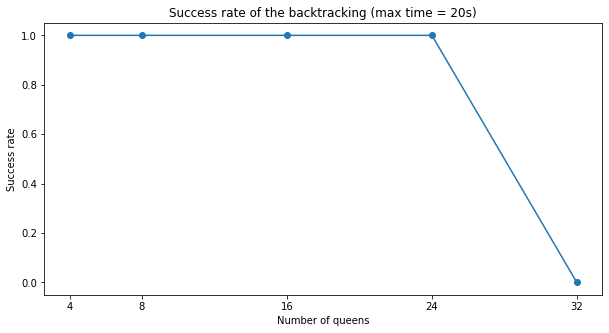

In [82]:
plot_experiments(backtracking_success_rates, "Success rate of the backtracking (max time = 20s)")

## Hill-Climbing <a id="hill-climbing"></a>

The **Hill Climbing** algorithm is a heuristic search for mathematical optimization problems. This algorithm takes an iterative approach to find a better solution by making incremental changes to the current state. 

In the context of the *N-Queens problem*, Hill Climbing involves placing the queens on the board and then iteratively moving them to reduce the number of conflicts.

#### Steps

Each queen is moved within its column to the position where the number of conflicts (with other queens) is minimal. The algorithm evaluates all possible moves for a queen and selects the move that results in the steepest descent or reduction in the conflict count.

1. It starts with an initial board
2. Configurations close to the current configuration are generated
3. It is evaluated which of them is better (according to the number of conflicts) than the current configuration
4. The best configuration is selected as the new current configuration
5. Steps from 2 to 4 are repeated

#### Advantages and Limitations

While this constraint can prevent endless wandering in flat areas of the search space, it can also lead the algorithm to get stuck in local optima, states where no further improvements can be made but are not the overall best solution.

### Efficiency

Hill Climbing without side moves is a useful algorithm for solving the N-Queens problem, particularly for smaller boards. However, as the size of the board increases, its effectiveness decreases due to the higher likelihood of getting stuck in local optima.

In [65]:
def hill_climbing_no_sideway_move(board: np.ndarray, max_time_seconds: int = 10) -> np.ndarray:
    """ Hill climbing algorithm to solve the N-Queens problem.

    Args:
        board (np.ndarray): board with queens positions.
        max_time_seconds (int, optional): Maximum time to run the algorithm. Defaults to 10.

    Returns:
        np.ndarray: Board with queens' positions.
    """    
    
    start_time = time.time()
    n = len(board)
    conflicts = count_conflicts_fast(board)
    min_conflicts = conflicts
    num_moves = 0
    
    while True:
        if conflicts == 0:
            break
        
        best_moves = None
        
        for i in range(n):
            # move each queen in different rows
            row = board[i]
            for j in range(n):
                if time.time() - start_time > max_time_seconds:
                    print(f"Time limit exceeded. Placed only {n-conflicts} queens")
                    return board
                
                if j != board[i]:
                    board[i] = j
                    new_conflicts = count_conflicts_fast(board)
                    if new_conflicts < min_conflicts:
                        min_conflicts = new_conflicts
                        best_moves = (i, j)                     
                    board[i] = row
                    
        if best_moves is None:
            break

        i, j = best_moves
        board[i] = j
        num_moves += 1
        conflicts = min_conflicts

    if conflicts == 0:
        print(f"N-Queens's problem solved with a total of {num_moves} moves.\n"
              f"Execution time: {round(time.time() - start_time,3)}s")
    else:
        print(f"N-Queens's problem not solved in {num_moves} moves. Number of conflicts: {conflicts}")        
    return board

**Stochastic Hill Climbing** is a standard Hill Climbing search algorithm variant. Unlike traditional Hill Climbing, which consistently moves towards the direction of increasing elevation (or decreasing cost), the stochastic version introduces randomness in the selection of the next move, providing a way to escape local optima.

#### Sideways Moves

The key feature of this variant is the allowance of **sideways moves**: moves that do not improve the current state but do not worsen it either. These moves are crucial in navigating plateaus, regions where all neighboring states have the same value. A limit is set on consecutive sideways moves to prevent indefinite movements between solutions with the same number of conflicts. After reaching the limit, only moves that decrease conflicts are considered.

#### Selection of Moves

The algorithm evaluates all possible moves (including sideways) for a randomly selected queen at each step. Unlike deterministic Hill Climbing, it chooses the next move stochastically from among these options. This random selection helps avoid getting stuck in local optima and allows the algorithm to explore more of the search space.

#### Effectiveness in the N-Queens Problem

Stochastic Hill Climbing with sideways moves tends to be more effective than the basic Hill Climbing approach for the N-Queens problem, especially for larger boards. Allowing sideways moves and incorporating randomness increases the chances of escaping local optima and finding a solution.

#### Results
Based on this study, where different values of N (`4, 8, 16, 24, 32, 40, 48`) have been tested each 10 times (with a maximum time of execution of 20 seconds and with a maximum of 100 consecutive sideways moves), and then the success rate has been calculated. The algorithm performed exceptionally well with N values ranging from 4 to 40, with a `100%` success rate. However, with N=48, the success rate dropped to 20% due to the 20-second execution time limit. However, it has been shown that when the time execution limit is increased to 60 seconds, the algorithm solves the problem even with N=60.

In [72]:
import numpy as np
import random

def hill_climbing_sideway_moves(board: np.ndarray,
                                max_sideways_moves: int = 100,
                                max_time_seconds: int = 10) -> np.ndarray:
    """ Hill climbing algorithm to solve the N-Queens problem using sideway moves.

    Args:
        board (np.ndarray): board with queens positions.
        max_sideways_moves (int, optional): Number of sideway moves. Defaults to 100.
        max_time_seconds (int, optional): Maximum time to run the algorithm. Defaults to 10 seconds.

    Returns:
        np.ndarray: Board with queens' positions.
    """    
    
    start_time = time.time()
    n = len(board)
    count_sideway_moves = 0
    tot_sideway_moves = 0
    num_moves = 0
    conflicts = count_conflicts_fast(board)
    
    while count_sideway_moves < max_sideways_moves:
        if conflicts == 0:
            break
        
        best_moves = []
        sideways_moves = []

        for i in range(n):
            # move each queen in different rows
            if time.time() - start_time > max_time_seconds:
                print(f"Time limit exceeded. Placed only {n-conflicts} queens")
                return board
            
            row = board[i]
            for j in range(n):
                if j != board[i]:
                    board[i] = j
                    new_conflicts = count_conflicts_fast(board)
                    
                    if new_conflicts < conflicts:
                        best_moves.append((i, j))
                    elif new_conflicts == conflicts:
                        sideways_moves.append((i, j))                        
                    board[i] = row

        if best_moves:
            i, j = random.choice(best_moves)
            count_sideway_moves = 0
        elif sideways_moves:
            i, j = random.choice(sideways_moves)
            count_sideway_moves += 1
            tot_sideway_moves += 1             
        else:
            print("No moves found")
            break

        num_moves += 1
        board[i] = j
        conflicts = count_conflicts_fast(board)

    if conflicts == 0:
        print(f"N-Queens's problem solved with a total of {num_moves} moves of which {tot_sideway_moves} are sideways moves.\n"
              f"Execution time: {round(time.time() - start_time,3)}s")
    else:
        print(f"N-Queens's problem not solved in {num_moves} moves. Number of conflicts: {conflicts}")        
    return board

In [73]:
board = gen_board_per_col_row(8)

In [74]:
board_solved = hill_climbing_no_sideway_move(board)
print_board(board_solved)

N-Queens's problem not solved in 2 moves. Number of conflicts: 2
. . . . Q . . . 
. Q . . . . . . 
. . . Q . . . . 
. . . . . . Q . 
Q . . . . . . . 
. . Q . . . . . 
. . . . . Q . . 
. . . . . . . Q 


In [42]:
board = gen_board_per_col_row(60)

board_solved = hill_climbing_sideway_moves(board, max_time_seconds=60)
print_board(board_solved)

N-Queens's problem solved with a total of 59 moves of which 33 are sideways moves.
Execution time: 55.013s
. . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . Q . . . . . . . . 

In [70]:
def test_hill_climbing(list_n: List[int],
                      max_sideways_moves: int = 100,
                      max_time_seconds: int = 20, 
                      num_experiments: int = 10) -> List[Tuple[int, float]]:
    """ Test the hill climbing algorithm

    Args:
        list_n (List[int]): List of number of queens to test
        max_sideways_moves (int, optional): Maximum number of consecutive sideways moves. Defaults to 100.
        max_time_seconds (int, optional): Maximum time to run the algorithm. Defaults to 20.
        num_experiments (int, optional): Number of experiments to run for each number of queens. Defaults to 10.

    Returns:
        List[Tuple[int, float]]: List of tuples with the number of queens and the success rate
    """   
    success_rates = []
    for num_quuens in list_n:
        print(f"Testing {num_quuens} queens:")
        count_solved = 0
        for _ in range(num_experiments):
            board = hill_climbing_sideway_moves(gen_board_per_col_row(num_quuens), 
                                                max_sideways_moves=max_sideways_moves,
                                                max_time_seconds=max_time_seconds)
            if count_conflicts_fast(board) == 0:
                count_solved += 1
        success_rates.append((num_quuens, count_solved/num_experiments))
        
    return success_rates

In [77]:
hc_sideway_success_rates = test_hill_climbing([4, 8, 16, 24, 32, 40, 48], max_sideways_moves=100, max_time_seconds=20, num_experiments=10)

Testing 4 queens:
N-Queens's problem solved with a total of 0 moves of which 0 are sideways moves.
Execution time: 0.0s
N-Queens's problem solved with a total of 5 moves of which 1 are sideways moves.
Execution time: 0.002s
N-Queens's problem solved with a total of 4 moves of which 1 are sideways moves.
Execution time: 0.001s
N-Queens's problem solved with a total of 0 moves of which 0 are sideways moves.
Execution time: 0.0s
N-Queens's problem solved with a total of 2 moves of which 1 are sideways moves.
Execution time: 0.001s
N-Queens's problem solved with a total of 5 moves of which 0 are sideways moves.
Execution time: 0.002s
N-Queens's problem solved with a total of 2 moves of which 1 are sideways moves.
Execution time: 0.001s
N-Queens's problem solved with a total of 2 moves of which 1 are sideways moves.
Execution time: 0.001s
N-Queens's problem solved with a total of 4 moves of which 0 are sideways moves.
Execution time: 0.004s
N-Queens's problem solved with a total of 0 moves 

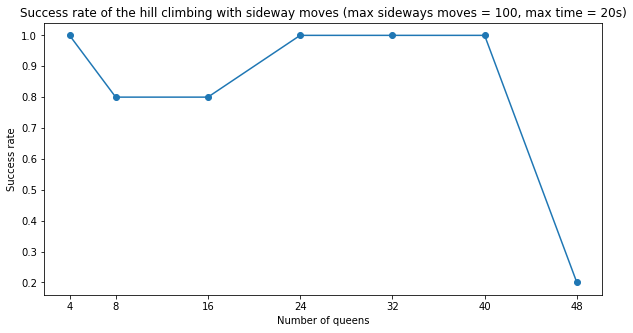

In [79]:
plot_experiments(hc_sideway_success_rates, "Success rate of the hill climbing with sideway moves (max sideways moves = 100, max time = 20s)")

### Random-Restart Hill Climbing with Stochastic Hill Climbing and Sideways Moves <a id="random-restart-hill-climbing"></a>

**Random-Restart Hill Climbing with Stochastic Hill Climbing and Sideways Moves** approach combines the concepts of random restarts with the flexibility of Stochastic Hill Climbing with Sideways Moves.

**Stochastic Hill Climbing with Sideways Moves**, like any hill climbing algorithm, can still get stuck in local optima. To mitigate this, the algorithm incorporates **random restarts**.

#### Random Restarts

Whenever the algorithm reaches a point where no further progress is made (indicative of a local optimum), it restarts with a new random configuration of queens instead of terminating. 

This process is iteratively repeated, with each iteration representing an independent attempt to find a solution. The algorithm continues until it finds a solution or reaches a predefined limit of restarts or time.

In [78]:
def hill_climbing_random_restart(num_queens: int,
                                max_sideways_moves: int = 100,
                                max_random_restarts: int = 100,
                                max_time_seconds: int = 20) -> np.ndarray:
    """ Hill climbing algorithm to solve the N-Queens problem using random restarts.

    Args:
        num_queens (int): Number of queens.
        max_sideways_moves (int, optional): Number of sideway moves. Defaults to 100.
        max_random_restarts (int, optional): Number of random restarts. Defaults to 100.
        max_time_seconds (int, optional): Maximum time to run the algorithm. Defaults to 10 seconds.

    Returns:
        np.ndarray: Board with queens' positions.
    """    
    num_conflicts = sys.maxsize
    # we start with -1 because we don't count the first random restart
    count_random_restart = -1
    
    while num_conflicts > 0 and count_random_restart < max_random_restarts:
        print(f"\nRandom restart {count_random_restart+1}:\n")
        board = gen_board_per_col_row(num_queens)
        board_hc = hill_climbing_sideway_moves(board, max_sideways_moves, max_time_seconds)
        num_conflicts = count_conflicts_fast(board_hc)
        count_random_restart += 1
    
    print("\n\n")
    print(f"N-Queens's problem solved with {count_random_restart} random restarts")	
    return board

In [80]:
board_solved = hill_climbing_random_restart(40, max_time_seconds=10)
print_board(board_solved)


Random restart 0:

Time limit exceeded. Placed only 39 queens

Random restart 1:

Time limit exceeded. Placed only 39 queens

Random restart 2:

Time limit exceeded. Placed only 39 queens

Random restart 3:

N-Queens's problem solved with a total of 36 moves of which 18 are sideways moves.
Execution time: 8.413s



N-Queens's problem solved with 3 random restarts
. . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . 
. . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . 
. . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . 

## Simulated Annealing <a id="simulated-annealing"></a>

Simulated Annealing (SA) is a heuristic technique for approximating the global optimum of a given function. It's often used when the search space is discrete (e.g., all possible solutions to the n-queens problem). 

For a problem like n-queens, we define a "state" as a particular arrangement of n-queens on the board and the "energy" of that state as the number of pairs of queens attacking each other. The goal is to find a state with the lowest possible energy (ideally zero).

![simulated_annealing.png](images/simulated_annealing.png)

#### Steps

1. **Initialization**: SA starts with a random arrangement of queens on the board.

2. **Iteration**: At each iteration, the algorithm generates a random neighbor of the current arrangement by moving one queen to a different column in its row. 

3. **Acceptance**: If the new arrangement has fewer conflicts (lower energy) than the current one, it is accepted as the new one. Suppose the new arrangement has more conflicts (higher energy) than the current arrangement. In that case, it is accepted with probability $$\exp(-\Delta/T)$$ where $\Delta$ is the difference in conflicts between the current and new arrangements, and $T$ is the current temperature. This acceptance probability ensures the algorithm is not stuck in local minima.

4. **Cooling**: The temperature $T$ gradually decreases according to a cooling schedule, which controls the rate at which the algorithm explores the search space. As $T$ approaches zero, the algorithm becomes more greedy and is less likely to accept worse solutions.

The temperature schedule adopted is a geometric cooling schedule, defined as:

```python
def temperature_schedule(initial_temperature, cooling_rate, t):
    return initial_temperature * cooling_rate**t
```

The temperature at time $t$ is equal to the initial temperature times the cooling rate raised to the power of $t$, ensuring the temperature decreases slowly, allowing the algorithm to explore the search space thoroughly.

#### Results
Based on this study, where different values of N (`4, 8, 16, 24, 32, 40, 48, 56, 64`) have been tested each 10 times (with a maximum time of execution of 20 seconds). The success rate was then calculated for each value of N. The algorithm performed exceptionally well with N values ranging from 4 to 40, achieving a success rate of `100%` and `90%`. However, when N was increased to 56, the success rate dropped to around 60%, and for N=64 dropped to 40%, mainly due to the strong constraint of the maximum execution time of 20 seconds. However, when the execution time was increased to 1 minute, the methods showed strong performance even with N=100.

In [34]:
# Geometric cooling schedule
def temperature_schedule(initial_temperature: float, cooling_rate: float, t: int) -> float:
    """ Geometric cooling schedule

    Args:
        initial_temperature (float): The initial temperature.
        cooling_rate (float): The cooling rate.
        t (int): The current iteration.

    Returns:
        float: The new temperature calculated with the cooling schedule.
    """    
    return initial_temperature*cooling_rate**t

def simulated_annealing(board: np.ndarray, 
                        initial_temperature: float = 100, 
                        cooling_rate: float = 0.999,
                        max_time_seconds: int = 20) -> np.ndarray:
    """ Simulated annealing algorithm to solve the N-Queens problem.

    Args:
        board (np.ndarray): board with queens positions.
        initial_temperature (float, optional): Initial temperature. Defaults to 100.
        cooling_rate (float, optional): Cooling rate. Defaults to 0.999.
        max_time_seconds (int, optional): Maximum time to run the algorithm. Defaults to 10 seconds.
    Returns:
        np.ndarray: Board with queens' positions.
    """
    time_start = time.time()
    count_better_moves = 0
    count_side_moves = 0
    
    for t in range(sys.maxsize):
        if time.time() - time_start > max_time_seconds:
            print(f"Time limit exceeded.")
            return board
        T = temperature_schedule(initial_temperature, 
                                 cooling_rate, 
                                 t
                                )
        current_conflicts = count_conflicts_fast(board)

        if T == 0 or current_conflicts == 0: 
            break

        next_state = board.copy()

        queen_index_column = np.random.randint(0, len(board))
        queen_index_row = np.random.randint(0, len(board))
        while next_state[queen_index_column] == queen_index_row:
            queen_index_row = np.random.randint(0, len(board))
            
        next_state[queen_index_column] = queen_index_row
        next_state_conflicts = count_conflicts_fast(next_state)
        
        delta_E = next_state_conflicts - current_conflicts

        # delta_E is negative if the next state is better than the current state
        if delta_E > 0:
            if np.exp(-delta_E / T) > random.random():
                count_side_moves += 1
                board = next_state
        else:
            board = next_state
            count_better_moves += 1
            
    if count_conflicts_fast(board) == 0:              
        print(f"N-Queens's problem solved with {count_better_moves} better moves and {count_side_moves} sideway moves")
    else:
        print(f"N-Queens's problem NOT solved with {count_better_moves} better moves and {count_side_moves} sideway moves")
    return board

In [91]:
board = gen_board_per_col(60)

time_start = time.time()
board_solved = simulated_annealing(board)
end_time = time.time()
print(f"Time taken: {round(end_time - time_start,3)}s")

print_board(board_solved)

N-Queens's problem solved with 3041 better moves and 1580 sideway moves
Time taken: 9.59s
. . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . .

In [92]:
board = gen_board_per_col(100)

time_start = time.time()
board_solved = simulated_annealing(board)
end_time = time.time()
print(f"Time taken: {round(end_time - time_start,3)}s")

print_board(board_solved)

N-Queens's problem solved with 3314 better moves and 1620 sideway moves
Time taken: 50.417s
. Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [67]:
def test_simulated_annealing(list_n: List[int],
                      max_time_seconds: int = 20, 
                      num_experiments: int = 10) -> List[Tuple[int, float]]:
    """Test the simulated annealing algorithm

    Args:
        list_n (List[int]): List of number of queens to test
        max_time_seconds (int, optional): Maximum time to run the algorithm. Defaults to 10.
        num_experiments (int): Number of experiments to run for each number of queens

    Returns:
        List[Tuple[int, float]]: List of tuples with the number of queens and the success rate
    """    
    success_rates = []
    for num_quuens in list_n:
        print(f"Testing {num_quuens} queens:")
        count_solved = 0
        for _ in range(num_experiments):
            board = gen_board_per_col_row(num_quuens)
            board_sa = simulated_annealing(board, max_time_seconds=max_time_seconds)
            if count_conflicts_fast(board_sa) == 0:
                count_solved += 1
        success_rates.append((num_quuens, count_solved/num_experiments))
        
    return success_rates

def plot_simulated_annealing_experiments(success_rates: List[Tuple[int, float]]) -> None:
    """Plot the success rates

    Args:
        success_rates (List[Tuple[int, float]]): List of tuples with the number of queens and the success rate
    """    
    plt.figure(figsize=(10,5))
    plt.plot(*zip(*success_rates), marker='o')
    plt.xticks([n for n, _ in success_rates])
    plt.xlabel("Number of queens")
    plt.ylabel("Success rate")
    plt.title("Success rate of the simulated annealing algorithm (max time = 20s)")
    plt.show()

In [65]:
sa_success_rates = test_simulated_annealing([4, 8, 16, 24, 32, 40, 48, 56, 64], max_time_seconds=20, num_experiments=10)

Testing 4 queens:
N-Queens's problem solved with 293 better moves and 154 sideway moves
N-Queens's problem solved with 4 better moves and 0 sideway moves
N-Queens's problem solved with 29 better moves and 17 sideway moves
N-Queens's problem solved with 161 better moves and 92 sideway moves
N-Queens's problem solved with 107 better moves and 55 sideway moves
N-Queens's problem solved with 0 better moves and 0 sideway moves
N-Queens's problem solved with 281 better moves and 167 sideway moves
N-Queens's problem solved with 3 better moves and 0 sideway moves
N-Queens's problem solved with 6 better moves and 3 sideway moves
N-Queens's problem solved with 138 better moves and 77 sideway moves
Testing 8 queens:
N-Queens's problem solved with 2655 better moves and 1469 sideway moves
N-Queens's problem solved with 2737 better moves and 1537 sideway moves
N-Queens's problem solved with 2825 better moves and 1559 sideway moves
N-Queens's problem solved with 2777 better moves and 1617 sideway mov

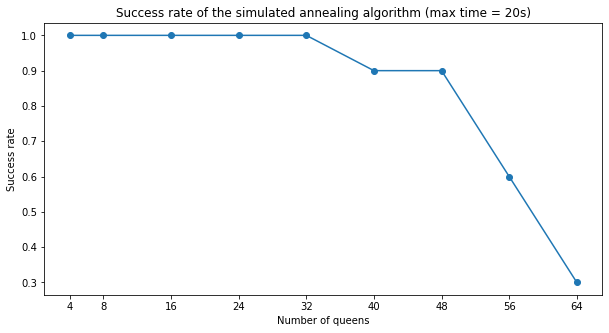

In [68]:
plot_simulated_annealing_experiments(sa_success_rates)

## Genetic Algorithms <a id="genetic"></a>
**Genetic Algorithms (GAs)** are a class of algorithms inspired by natural selection. These algorithms simulate the process of evolution to find solutions to optimization and search problems, making them suitable for complex problems like the N-Queens.

### Application to the N-Queens Problem

#### Initial Population

In the context of the N-Queens problem, a Genetic Algorithm starts by generating an initial population of potential solutions (different boards).

#### Fitness Function

A main component of the GA is the fitness function, which evaluates how close a given arrangement of queens is to solving the problem. In the case of N-Queens, the fitness can be measured by the number of non-attacking pairs of queens.

#### Selection, Crossover, and Mutation

The algorithm then iteratively applies three main operations: 

1. **Selection**: Choosing the fittest individuals from the current population.
2. **Crossover**: Combining pairs of individuals to produce new offspring, reflecting the exchange of genetic material.
3. **Mutation**: Introducing random changes to individual solutions helps explore new parts of the solution space and maintains genetic diversity. A mutation rate is set.

In [41]:
import random

def generate_initial_population(pop_size: int, n:int ) -> List[List[int]]:
    """ Generate the initial population of boards.

    Args:
        pop_size (int): Population size.
        n (int): Number of queens.

    Returns:
        List[List[int]]: The initial population.
    """    
    return [gen_board_per_col_row(n).tolist() for _ in range(pop_size)]

def calculate_fitness(board: List[int]) -> int:
    """ Calculate the fitness of a board. The fitness is the negative number of conflicts.

    Args:
        board (List[int]): Board with queens' positions.

    Returns:
        int: The fitness of the board.
    """    
    return -count_conflicts_fast(board)

def select(population: List[List[int]], fitnesses: List[int]) -> List[List[int]]:
    """ Select the best half of the population (the ones with the lowest number of conflicts)

    Args:
        population (List[List[int]]): Population of boards.
        fitnesses (List[int]): Fitness of each board.

    Returns:
        List[List[int]]: The best half of the population.
    """    
    sorted_population = sorted(zip(population, fitnesses), key=lambda x: x[1], reverse=True)
    return [population for population, _ in sorted_population[:len(population) // 2]]

def crossover(parent1: List[int], parent2: List[int]) -> (List[int], List[int]):
    """ Crossover two boards

    Args:
        parent1 (List[int]): The first parent.
        parent2 (List[int]): The second parent.

    Returns:
        (List[int], List[int]): The two children.
    """
    
    n = len(parent1)
    # crossover point
    c = random.randint(0, n - 1)
    return parent1[:c] + parent2[c:], parent2[:c] + parent1[c:]

def mutate(board: List[int], mutation_rate: float) -> List[int]:
    """ Mutate a board. Swap two random queens with a probability of mutation_rate.

    Args:
        board (List[int]): Board with queens' positions.
        mutation_rate (float): Mutation rate.

    Returns:
        List[int]: The mutated board.
    """    
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(board)), 2)
        board[i], board[j] = board[j], board[i]
    return board

def genetic_algorithm(n: int, pop_size: 
    int = 100, 
    mutation_rate: float = 0.05, 
    max_generations: int = 1000) -> Optional[List[int]]:
    """ Genetic algorithm to solve the N-Queens problem.

    Args:
        n (int): Number of queens.
        pop_size (int, optional): Population size. Defaults to 100.
        mutation_rate (float, optional): Mutation rate. Defaults to 0.05.
        max_generations (int, optional): Maximum number of generations. Defaults to 1000.

    Returns:
        Optional[List[int]]: The board with queens' positions if the problem is solved, None otherwise.
    """    
    population = generate_initial_population(pop_size, n)
    generation = 0

    while generation < max_generations:
        fitnesses = [calculate_fitness(board) for board in population]
        if max(fitnesses) == 0:
            print(f"N-Queens's problem solved in {generation} generations")
            return population[fitnesses.index(0)]
        new_population = select(population, fitnesses)
        offspring = []
        while len(offspring) < pop_size:
            parent1, parent2 = random.sample(new_population, 2)
            child1, child2 = crossover(parent1, parent2)
            offspring.append(mutate(child1, mutation_rate))
            offspring.append(mutate(child2, mutation_rate))
        population = offspring
        generation += 1

    print("Maximum number of generations reached")
    return None

In [55]:
n = 8
solution = genetic_algorithm(n, pop_size=100)

if solution:
    print(f"Number of conflicts: {count_conflicts_fast(solution)}")
    print_board(solution)
else:
    print("No solution found")

Maximum number of generations reached
No solution found


In [47]:
n = 16
solution = genetic_algorithm(n, pop_size=50, mutation_rate=0.01, max_generations=3000)

if solution:
    print(f"Number of conflicts: {count_conflicts_fast(solution)}")
    print_board(solution)
else:
    print("No solution found")

Maximum number of generations reached
No solution found


### Hyperparameter Tuning <a id="genetic-tuning"></a>

In applying Genetic Algorithms (GAs) to the N-Queens problem, it has been observed that the method often struggles to find a solution, especially when the problem size is N=16. This difficulty persists despite extensive hyperparameter tuning.

### Hyperparameter Tuning Efforts

#### For N=8
- **Population Sizes Tested**: `[100, 200, 300]`
- **Mutation Rates Tested**: `[0.01, 0.03, 0.05]`
- **Maximum Generations**: `3000`
- **Number of Experiments**: `10` for each configuration

#### For N=16
- **Population Size**: `300`
- **Mutation Rates**: `[0.01, 0.03, 0.05]`
- **Maximum Generations**: `3000`
- **Number of Experiments**: `10`

### Analysis of Challenges
While slightly effective for smaller instances (like N=8), genetic algorithms may not efficiently navigate the exponentially growing search space for larger N values.

The results also point out that adjusting standard hyperparameters such as population size, mutation rates, and the number of generations may not sufficiently address the inherent difficulties of higher N-Queens problems. Testing the algorithm with N=8 showed only a 90% success rate when the population size was 300 and the mutation rate was set to 0.03. However, the results were quite discouraged for N=16, as all configurations except one had a 0% success rate. The one that performed slightly better had a population size of 200 and a mutation rate of 0.03, resulting in a 10% success rate.

In [91]:
def test_genetic_algorithm(n: int, 
                           pop_sizes: List[int], 
                           mutation_rates: List[float], 
                           max_generations: int, 
                           num_experiments: int) -> List[Tuple[int, float, float]]:
    """ Test the genetic algorithm with different parameters

    Args:
        n (int): Number of queens.
        pop_sizes (List[int]): Population sizes.
        mutation_rates (List[float]): List of mutation rates.
        max_generations (int): Maximum number of generations.
        num_experiments (int): Number of experiments.

    Returns:
        List[Tuple[int, float, float]]: List of tuples with the parameters and the success rate.
    """    
    success_rates = []

    for pop_size in pop_sizes:
        for mutation_rate in mutation_rates:
            successes = 0
            for _ in range(num_experiments):
                solution = genetic_algorithm(n, pop_size, mutation_rate, max_generations)
                if solution and count_conflicts_fast(solution) == 0:
                    successes += 1
            success_rate = successes / num_experiments
            success_rates.append((pop_size, mutation_rate, success_rate))
            print(f"pop_size={pop_size}, mutation_rate={mutation_rate}, success_rate={success_rate}")
    
    return success_rates

def plot_genetic_experiments(success_rates: List[Tuple[int, float, float]], 
                             title: str) -> None:
    """ Plot the results of the genetic algorithm experiments

    Args:
        success_rates (List[Tuple[int, float, float]]): List of tuples with the parameters and the success rate.
        title (str): Title of the plot.
    """    
    labels = [f"pop={p}, mut={m}" for p, m, _ in success_rates]
    rates = [rate for _, _, rate in success_rates]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, rates)
    plt.xlabel('Parameter Configuration')
    plt.ylabel('Success Rate')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.ylim(0, 1)
    plt.show()

In [84]:
n = 8
pop_sizes = [100, 200, 300]  # Example population sizes to test
mutation_rates = [0.01, 0.03, 0.05]  # Example mutation rates to test
max_generations = 3000
num_experiments = 10  # Number of experiments to run for each configuration

success_rates_n8 = test_genetic_algorithm(n, pop_sizes, mutation_rates, max_generations, num_experiments)

Maximum number of generations reached
Maximum number of generations reached
Maximum number of generations reached
N-Queens's problem solved in 0 generations
Maximum number of generations reached
Maximum number of generations reached
Maximum number of generations reached
Maximum number of generations reached
N-Queens's problem solved in 15 generations
N-Queens's problem solved in 11 generations
pop_size=100, mutation_rate=0.01, success_rate=0.3
Maximum number of generations reached
N-Queens's problem solved in 0 generations
Maximum number of generations reached
N-Queens's problem solved in 38 generations
N-Queens's problem solved in 19 generations
Maximum number of generations reached
N-Queens's problem solved in 12 generations
Maximum number of generations reached
Maximum number of generations reached
Maximum number of generations reached
pop_size=100, mutation_rate=0.03, success_rate=0.4
N-Queens's problem solved in 0 generations
N-Queens's problem solved in 11 generations
N-Queens's 

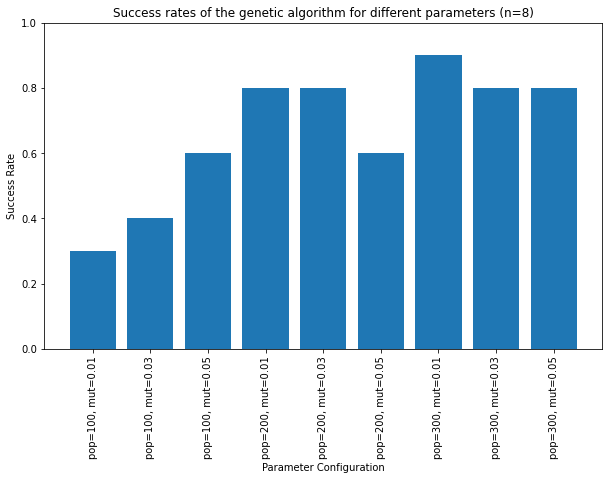

In [88]:
plot_genetic_experiments(success_rates_n8, "Success rates of the genetic algorithm for different parameters (n=8)")

In [89]:
n = 16
pop_sizes = [200]  # Example population sizes to test
mutation_rates = [0.01, 0.03, 0.05]  # Example mutation rates to test
max_generations = 3000
num_experiments = 10  # Number of experiments to run for each configuration

success_rates_n16 = test_genetic_algorithm(n, pop_sizes, mutation_rates, max_generations, num_experiments)

Maximum number of generations reached
Maximum number of generations reached
Maximum number of generations reached
Maximum number of generations reached
Maximum number of generations reached
Maximum number of generations reached
Maximum number of generations reached
Maximum number of generations reached
Maximum number of generations reached
Maximum number of generations reached
pop_size=200, mutation_rate=0.01, success_rate=0.0
Maximum number of generations reached
Maximum number of generations reached
Maximum number of generations reached
Maximum number of generations reached
Maximum number of generations reached
Maximum number of generations reached
Maximum number of generations reached
Maximum number of generations reached
N-Queens's problem solved in 561 generations
Maximum number of generations reached
pop_size=200, mutation_rate=0.03, success_rate=0.1
Maximum number of generations reached
Maximum number of generations reached
Maximum number of generations reached
Maximum number of

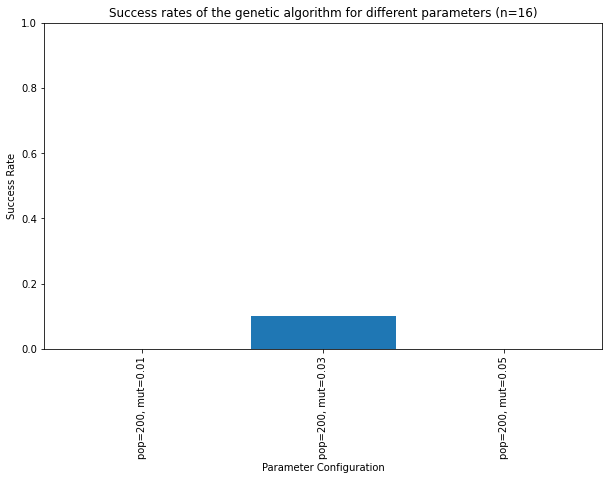

In [90]:
plot_genetic_experiments(success_rates_n16, "Success rates of the genetic algorithm for different parameters (n=16)")

# Conclusion <a id="conclusion"></a>

**Random Search** is a stochastic method, meaning that it uses randomness to explore the search space. However, when it comes to the problem of N-queens, Random Search struggles to find solutions even for relatively small search spaces, such as when $N=8$, where it has a success rate of only $40\%$.

On the other hand, **Backtracking** is a deterministic method that systematically explores the search space by backtracking when it reaches a dead end. It significantly improves the results obtained from Random Search, especially for smaller search spaces, like when $N=24$, achieving a success rate of $100\%$; however, when it comes to larger search spaces, like $N=32$, Backtracking's success rate drops to $0\%$.

**Standard Hill Climbing** approach fails to solve the problem even with only $8$ queens due to getting trapped in local optima. In contrast, using sideways moves ensures finding a solution even with more queens of what has been obtained with previous methods. Nevertheless, the downside of using sideways moves is that finding a solution takes significantly longer, requiring 55 seconds to solve the problem with $N=60$. However, by utilizing a **combination of Stochastic Hill Climbing and sideways moves**, it has been possible to significantly improve the results from $N=24$, achieved through Backtracking, to $N=60$, demonstrating the efficacy of this approach in optimizing our outcomes.


Based on the results of this project, **Simulated Annealing** stands out as the most efficient algorithm for solving the N-Queens problem, particularly for larger values of N. For example, the problem of placing `60 queens was solved in just 10 seconds`, whereas Hill Climbing with Sideways Moves took around $1$ minute to solve the same problem. This difference in performance time highlights the limitations of Hill Climbing when dealing with larger and more complex instances of the problem, where it struggles with local optima and requires more time for exploration.

**Simulated Annealing** also solved the N-Queens problem with `100 queens` in just $50$ seconds. This result demonstrates its scalability and superiority in handling significantly larger problems than other methods.

It has been shown that **Genetic Algorithms** are not the most efficient methods for solving the N-queens problem, especially when compared to other methods studied. Even when `hyperparameters are fine-tuned`, they struggle with $N=8$. Meanwhile, a basic backtracking algorithm had a $100\%$ success rate with $N=24$.